# Configurando e automatizando a interação com um gráfico web usando Selenium

Este é um exemplo de como configurar e automatizar a interação com um gráfico em uma página da web usando o Selenium WebDriver em Python.

## Motivação

Às vezes, precisamos automatizar tarefas de interação com páginas da web, como fazer capturas de tela de gráficos ou extrair dados deles. O Selenium é uma ferramenta poderosa para automatizar essas interações.

## Passos

### 1. Configurando o Driver

- Importamos as bibliotecas necessárias do Selenium e configuramos o driver do Chrome.
- Escolhemos opções para o navegador, como tamanho da janela e maximização da mesma.
- Configuramos a estratégia de carregamento da página para garantir que a página seja carregada completamente antes de prosseguir.

### 2. Abrindo o Site e Preparando o Gráfico

- Definimos uma função para abrir um site específico e garantir que um elemento específico (o gráfico) esteja visível.
- Utilizamos o XPath para localizar o elemento do gráfico na página.
- Esperamos até que o elemento esteja presente no DOM e visível na página.
- Se bem-sucedido, a função retorna o elemento do gráfico para interações futuras.
- Caso contrário, tratamos exceções e informamos sobre falhas.

### 3. Exemplo de Uso

- Configuramos o driver e abrimos o site de exemplo.
- Verificamos se o elemento do gráfico foi carregado com sucesso.
- Se o elemento do gráfico estiver disponível, confirmamos que está pronto para interação.

Com o Selenium, podemos automatizar a interação com elementos da web, como gráficos, facilitando a captura de dados ou a execução de tarefas repetitivas em páginas da web.



In [65]:
#pip install selenium

In [66]:
#pip install webdriver_manager

In [67]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options

# Variável global para o driver
global driver

def setup_driver():
    """Configura o Selenium WebDriver globalmente."""
    global driver
    options = Options()
    options.add_argument("--window-size=1920,1080")  # Garante que a janela seja grande o suficiente para exibir todos os elementos.
    options.add_argument("--start-maximized")  # Inicia o navegador maximizado para garantir que todos os elementos sejam visíveis.
    options.page_load_strategy = 'normal'  # Garante que o driver espere as páginas carregarem completamente.
    service = ChromeService(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)

def open_website_and_prepare_graph(url, graph_xpath):
    """Abre um site e garante que um elemento específico (gráfico) seja visível."""
    global driver
    try:
        driver.get(url)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, graph_xpath)))  # Verifica se o elemento está no DOM.
        graph = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, graph_xpath)))  # Aguarda até que o elemento seja visível.
        driver.execute_script("arguments[0].scrollIntoView(true);", graph)  # Faz a página rolar para tornar o elemento visível.
        print("O gráfico está preparado e visível.")
        return graph  # Retorna o elemento do gráfico para ações posteriores, se necessário.
    except Exception as e:
        print(f"Falha ao abrir o site e preparar o gráfico: {e}")
        return None

# Exemplo de configuração do driver e abertura do site
setup_driver()
graph_element = open_website_and_prepare_graph("https://pricehistoryapp.com/product/apple-iphone-x-64gb-space-grey", "//div[contains(@class, 'apexcharts-canvas')]")

if graph_element:
    print("O elemento do gráfico foi carregado com sucesso e está pronto para interação.")
else:
    print("Houve um problema ao carregar o elemento do gráfico.")


O gráfico está preparado e visível.
O elemento do gráfico foi carregado com sucesso e está pronto para interação.


A função a seguir tem como objetivo extrair os dados utilizando a instância ActionChains para simular ações de mouse.


### Estimativa do Tamanho do Passo:
- Obtém a largura do gráfico para estimar o tamanho do passo para cada ponto de dados.

- Define um passo de 1 pixel para cada ponto de dados, assumindo uma largura padrão.
### Captura de Dados do Tooltip:
- Inicia um loop para percorrer os pontos de dados ao longo do eixo x do gráfico.


- Move o cursor do mouse em pequenos incrementos ao longo do eixo x usando move_to_element_with_offset().


- Aguarda a visibilidade do tooltip após o movimento do mouse.

- Extrai a data e o preço do tooltip e os armazena em um dicionário.

- Adiciona o dicionário contendo os dados capturados à lista all_data.

### Tratamento de Exceções:
- Captura a exceção MoveTargetOutOfBoundsException se o mouse tentar se mover para fora da tela.

- Imprime uma mensagem indicando que o mouse tentou se mover para fora dos limites da tela e interrompe a captura de dados.

In [68]:
from selenium.common.exceptions import NoSuchElementException, TimeoutException, MoveTargetOutOfBoundsException
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def capturar_dados_tooltip():
    global driver

    # Encontra o elemento do gráfico na página
    graph = driver.find_element(By.CLASS_NAME, 'apexcharts-canvas')
    action = ActionChains(driver)
    
    # Obtém as dimensões do gráfico para estimar os pontos de dados
    largura = graph.size['width']
    passo = 1  # Estima o tamanho do passo para cada ponto de dados com base na largura do gráfico
    
    # Esta lista conterá todos os dados capturados como dicionários
    todos_os_dados = []
    try:
        # Passa o mouse sobre o gráfico e captura os dados
        for x_offset in range(-600, largura, passo):
            action.move_to_element_with_offset(graph, x_offset, 10).perform()  # Move-se em pequenos incrementos ao longo do eixo x.
            try:
                WebDriverWait(driver, 1).until(
                    EC.visibility_of_element_located((By.CLASS_NAME, "apexcharts-tooltip-text"))
                )
                data_texto = driver.find_element(By.CLASS_NAME, "apexcharts-tooltip-title").text
                preco_texto = driver.find_elements(By.CLASS_NAME, "apexcharts-tooltip-text-y-value")[0].text.replace('₹', '').replace(',', '')
                todos_os_dados.append({'Data': data_texto, 'Preço': preco_texto})
                print(f"Dados capturados em deslocamento X {x_offset}: Data: {data_texto}, Preço: {preco_texto}")
            except TimeoutException:
                print(f"Nenhum tooltip encontrado em deslocamento X {x_offset}.")
    except MoveTargetOutOfBoundsException:
        # Se o mouse tentar se mover para fora da tela, pare a captura de dados
        print("MoveTargetOutOfBoundsException: O mouse tentou sair dos limites da tela. Parando a captura de dados.")
    
    return todos_os_dados


In [69]:
import pandas as pd

# Capturar todos os dados do tooltip
todos_os_dados_tooltip = capturar_dados_tooltip()

# Converter a lista de dicionários para um DataFrame do pandas
df = pd.DataFrame(todos_os_dados_tooltip)
print(df.head())  # Imprimir as primeiras linhas do DataFrame

# Salvar o DataFrame em um arquivo CSV, se necessário
df.to_csv('dados_do_historico_de_preco.csv', index=False)


Dados capturados em deslocamento X -600: Data: 02 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -599: Data: 02 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -598: Data: 02 Nov 2019, Preço: 
Dados capturados em deslocamento X -597: Data: 02 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -596: Data: 02 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -595: Data: 02 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -594: Data: 02 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -593: Data: 02 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -592: Data: 02 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -591: Data: 04 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -590: Data: 04 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -589: Data: 05 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -588: Data: 06 Nov 2019, Preço: 84.099
Dados capturados em deslocamento X -587: Dat

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('dados_do_historico_de_preco.csv')
# Remover duplicatas
df.drop_duplicates(inplace=True)

df

,Data,Preço
0,02 Nov 2019,84.099
2,02 Nov 2019,NaN
9,04 Nov 2019,84.099
11,05 Nov 2019,84.099
12,06 Nov 2019,84.099
...,...,...
1297,16 May 2022,64.876
1302,20 May 2022,64.876
1305,21 May 2022,64.876
1307,22 May 2022,64.876


In [210]:
# Ordenar os valores pela data
df['Data'] = pd.to_datetime(df['Data'])
df.sort_values(by='Data', inplace=True)
df

In [212]:
# Verificar os valores nulos
df.isna().sum()

Data     0
Preço    1
dtype: int64

In [213]:
# Remover o valor nulo
df = df.dropna()

In [254]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
cor = 'b'

In [216]:
# Calcular estatísticas descritivas
stats = df.describe()
print("Estatísticas Descritivas:\n", stats)

# Calcular a média móvel
rolling_mean = df['Preço'].rolling(window=7).mean()
print("\nMédia Móvel (window=7):\n", rolling_mean)

Estatísticas Descritivas:
                                 Data       Preço
count                            228  228.000000
mean   2021-04-05 10:31:34.736841984   72.845513
min              2019-11-02 00:00:00   64.789000
25%              2020-06-04 18:00:00   64.876000
50%              2021-07-22 00:00:00   64.876000
75%              2022-02-03 12:00:00   79.990000
max              2022-05-28 00:00:00  102.180000
std                              NaN   12.095113

Média Móvel (window=7):
 0          NaN
9          NaN
11         NaN
12         NaN
16         NaN
         ...  
1297    64.876
1302    64.876
1305    64.876
1307    64.876
1311    64.876
Name: Preço, Length: 228, dtype: float64


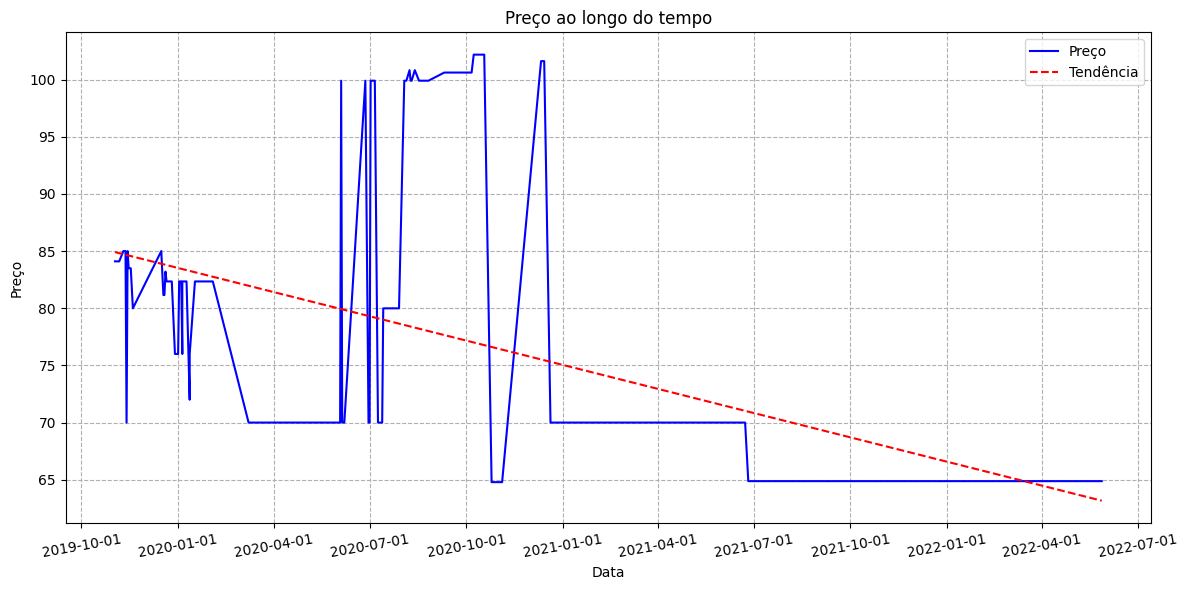

In [217]:
# Plotando um gráfico para comparar o preço ao longo do tempo e avaliar a sua tendência
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Preço'], marker=None, color='b', linestyle='-', label='Preço')

# Adicionar linha de tendência
z = np.polyfit(mdates.date2num(df['Data']), df['Preço'], 1)
p = np.poly1d(z)
plt.plot(df['Data'], p(mdates.date2num(df['Data'])), color='r', linestyle='--', label='Tendência')

# Adicionar grade detalhada
plt.grid(True, which='both', linestyle='--')

# Adicionar legenda
plt.legend()

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preço ao longo do tempo')

# Rotacionar rótulos do eixo x para melhor visualização
plt.xticks(rotation=10)

# Formatar datas no eixo x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Mostrar o plot
plt.tight_layout()
plt.show()

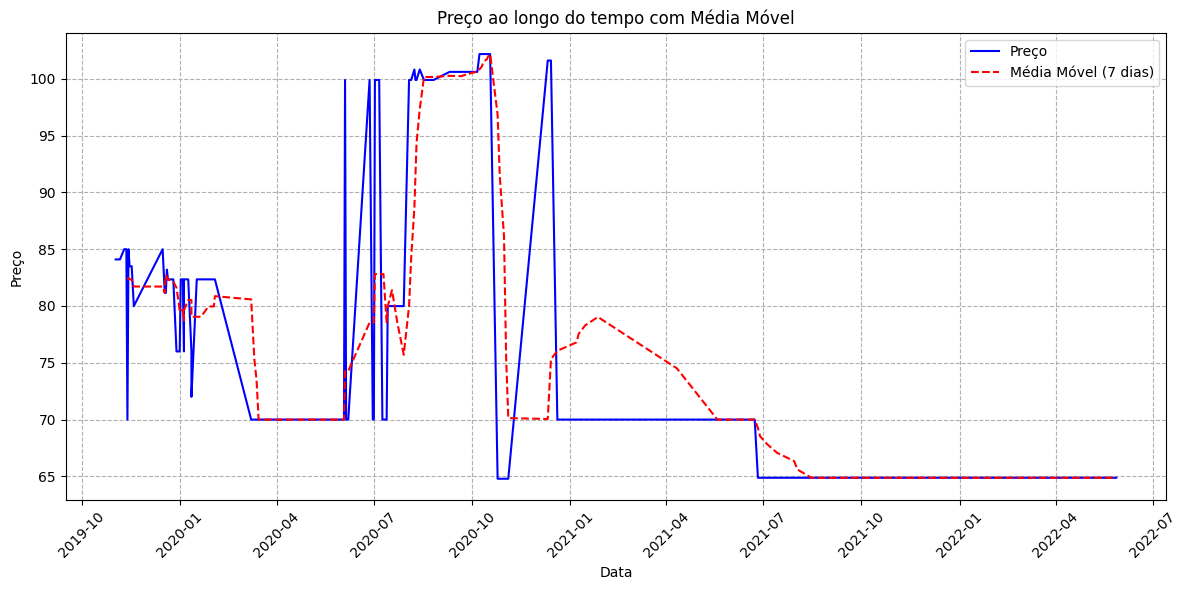

In [218]:
# Plotando um gráfico para comparar o preço ao longo do tempo a média móvel por semana

# Criar uma cópia do DataFrame
df_copy = df.copy()

# Convertendo a coluna 'Data' para o tipo datetime na cópia
df_copy['Data'] = pd.to_datetime(df_copy['Data'])

# Ordenando os valores pela coluna 'Data'
df_copy = df_copy.sort_values('Data')

# Calculando a média móvel com janela de 7 dias
df_copy['Media_Movel'] = df_copy['Preço'].rolling(window=7).mean()

# Criar o plot
plt.figure(figsize=(12, 6))
plt.plot(df_copy['Data'], df_copy['Preço'], marker=None, color='b', linestyle='-', label='Preço')
plt.plot(df_copy['Data'], df_copy['Media_Movel'], color='r', linestyle='--', label='Média Móvel (7 dias)')

# Adicionar grade detalhada
plt.grid(True, which='both', linestyle='--')


# Adicionar legenda
plt.legend()

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preço ao longo do tempo com Média Móvel')

# Rotacionar rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Mostrar o plot
plt.tight_layout()
plt.show()

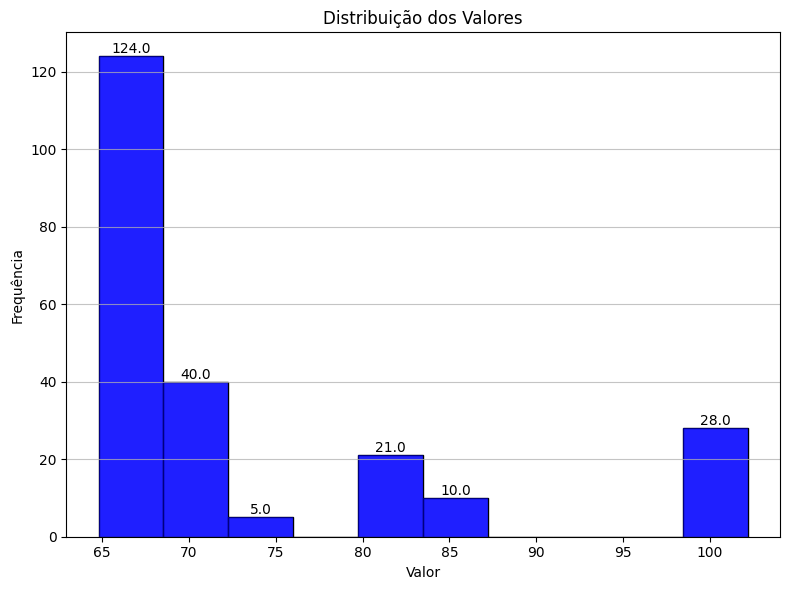

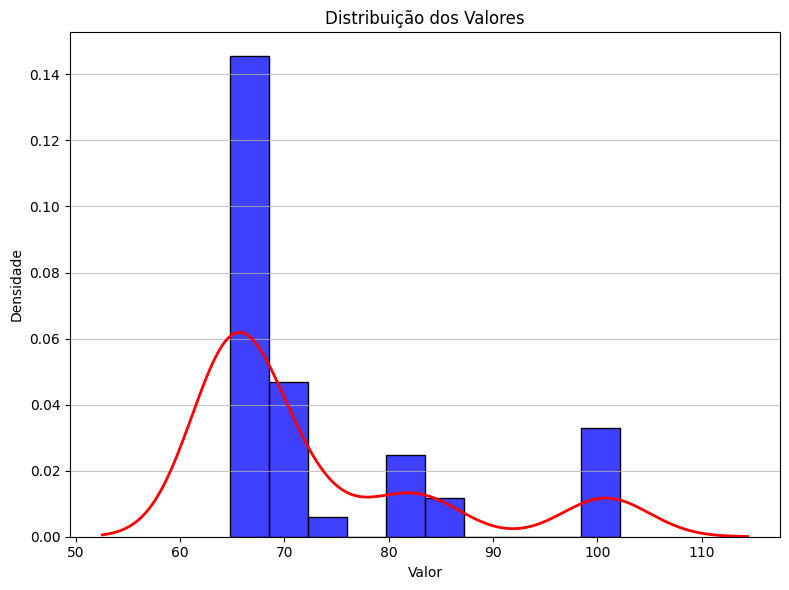

In [219]:
# Verificar a distribuição dos valores pela sua frequência e densidade


plt.figure(figsize=(8, 6))
sns.histplot(df['Preço'], bins=10, kde=False, color=cor)
plt.title('Distribuição dos Valores')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)

# Adicionar valores nos topos dos bins
bin_counts, bin_edges, _ = plt.hist(df['Preço'], bins=10, color=cor, alpha=0.5)
for count, edge in zip(bin_counts, bin_edges):
    if count != 0:  # Verifica se o valor da barra é diferente de zero
        plt.text(edge + (bin_edges[1] - bin_edges[0]) / 2, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(df['Preço'], bins=10, kde=False, color=cor, stat='density')
sns.kdeplot(df['Preço'], color='r', linestyle='-', linewidth=2)
plt.title('Distribuição dos Valores')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

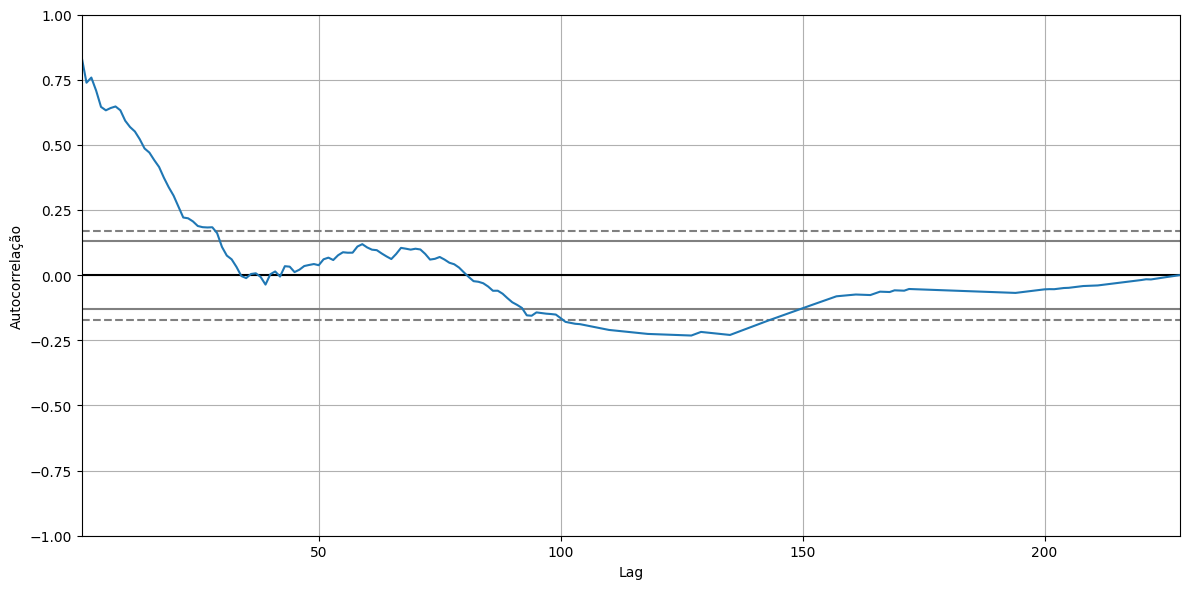

In [220]:
# Analisar a autocorrelação dos dados
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(df['Preço'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.tight_layout()
plt.show()

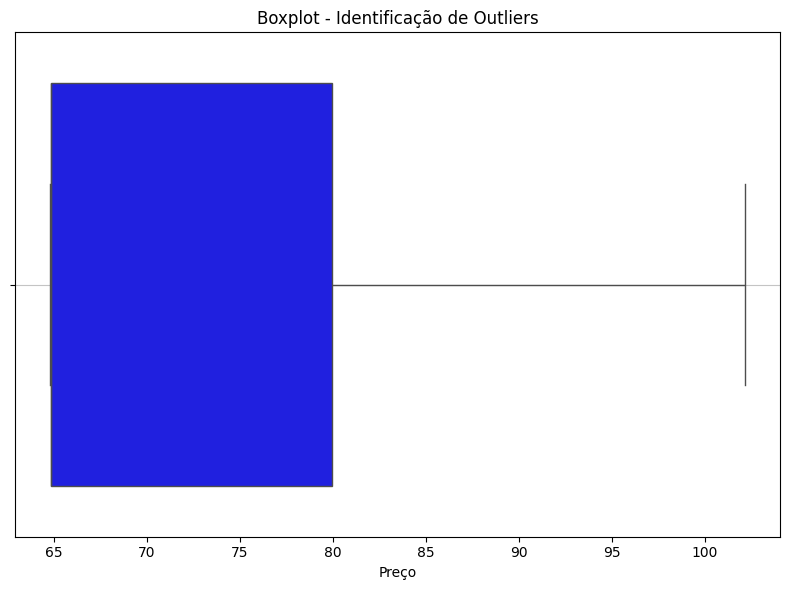

In [221]:
# Criar o boxplot para identificar Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Preço'], color=cor)
plt.title('Boxplot - Identificação de Outliers')
plt.xlabel('Preço')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

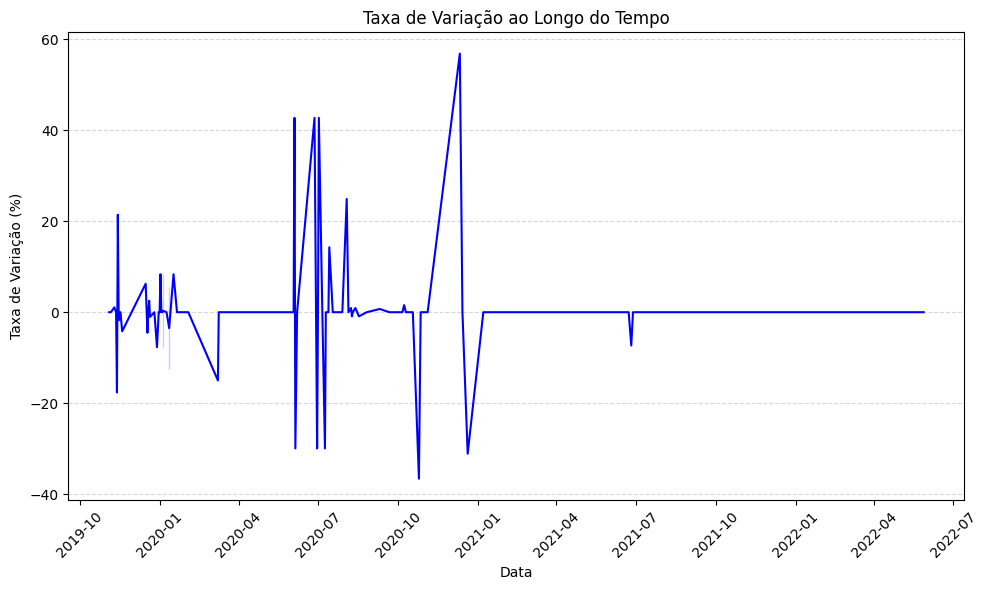

In [256]:
# Verificando a taxa de variação ao longo do tempo

# Criar uma cópia do DataFrame
df_copy = df.copy()

# Calcular a taxa de variação (porcentagem de mudança em relação ao dia anterior)
df_copy['Variation'] = df_copy['Preço'].pct_change() * 100

# Ajustar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o gráfico de linha com marcadores
sns.lineplot(x='Data', y='Variation', data=df_copy, marker=None, color='blue')

# Adicionar título e rótulos dos eixos
plt.title('Taxa de Variação ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Taxa de Variação (%)')

# Rotacionar rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Adicionar grade de fundo
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Mostrar o gráfico
plt.tight_layout()
plt.show()
